# Predicting a Pulsar Star



Пульсары - редкий тип нейтронных звезд, которые производят радиоизлучение, обнаруживаемое на Земле. Пульсары представляют значительный научный интерес как зонды пространства-времени, межзвездной среды и состояния материи.

Каждый кандидат описывается 8 непрерывными переменными и одной переменной класса. Первые 4 - простая статистика, полученная из интегрированного профиля импулься (сложный профиль, т.е. массив непрерывных переменных, которые описывают версию сигнала с разрешением по долготе, усредненную как по времени, так и по частоте). Остальные четыре переменные получены из кривой DM-SNR аналогично.


#  Исследование Датасета
## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data=pd.read_csv('pulsar_stars.csv')
type(data)

pandas.core.frame.DataFrame

In [4]:
header = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve', 'class']
data.columns = header
data

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [5]:
data.head(3)

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [6]:
data.tail(3)

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [7]:
data.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


## Построение матрицы ковариации

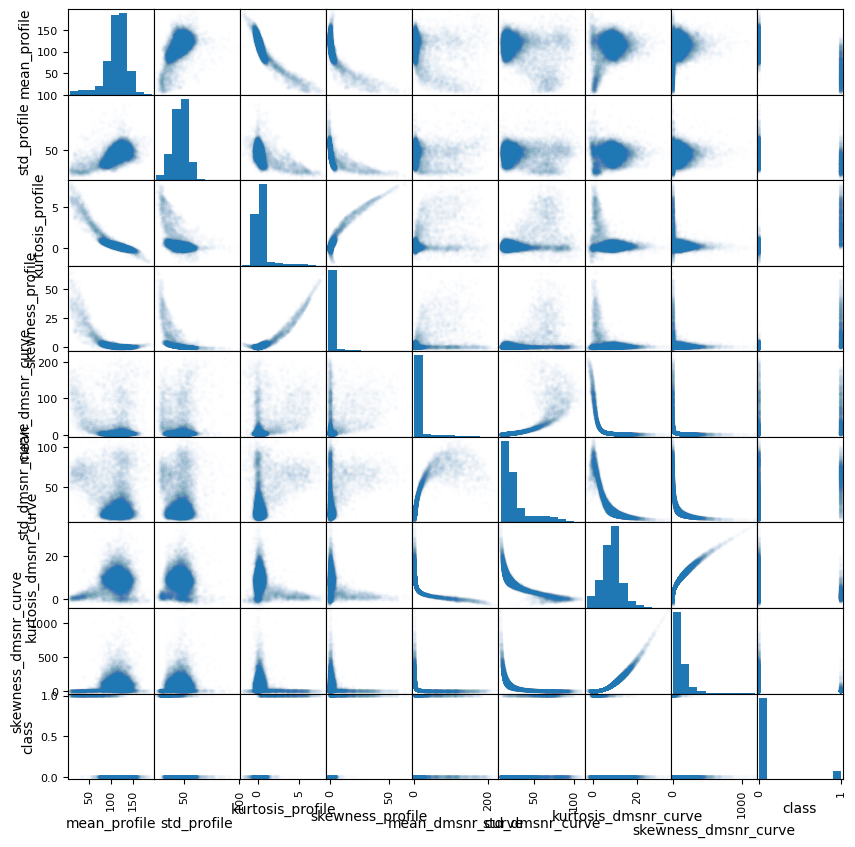

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01 , figsize = (10,10))
pass

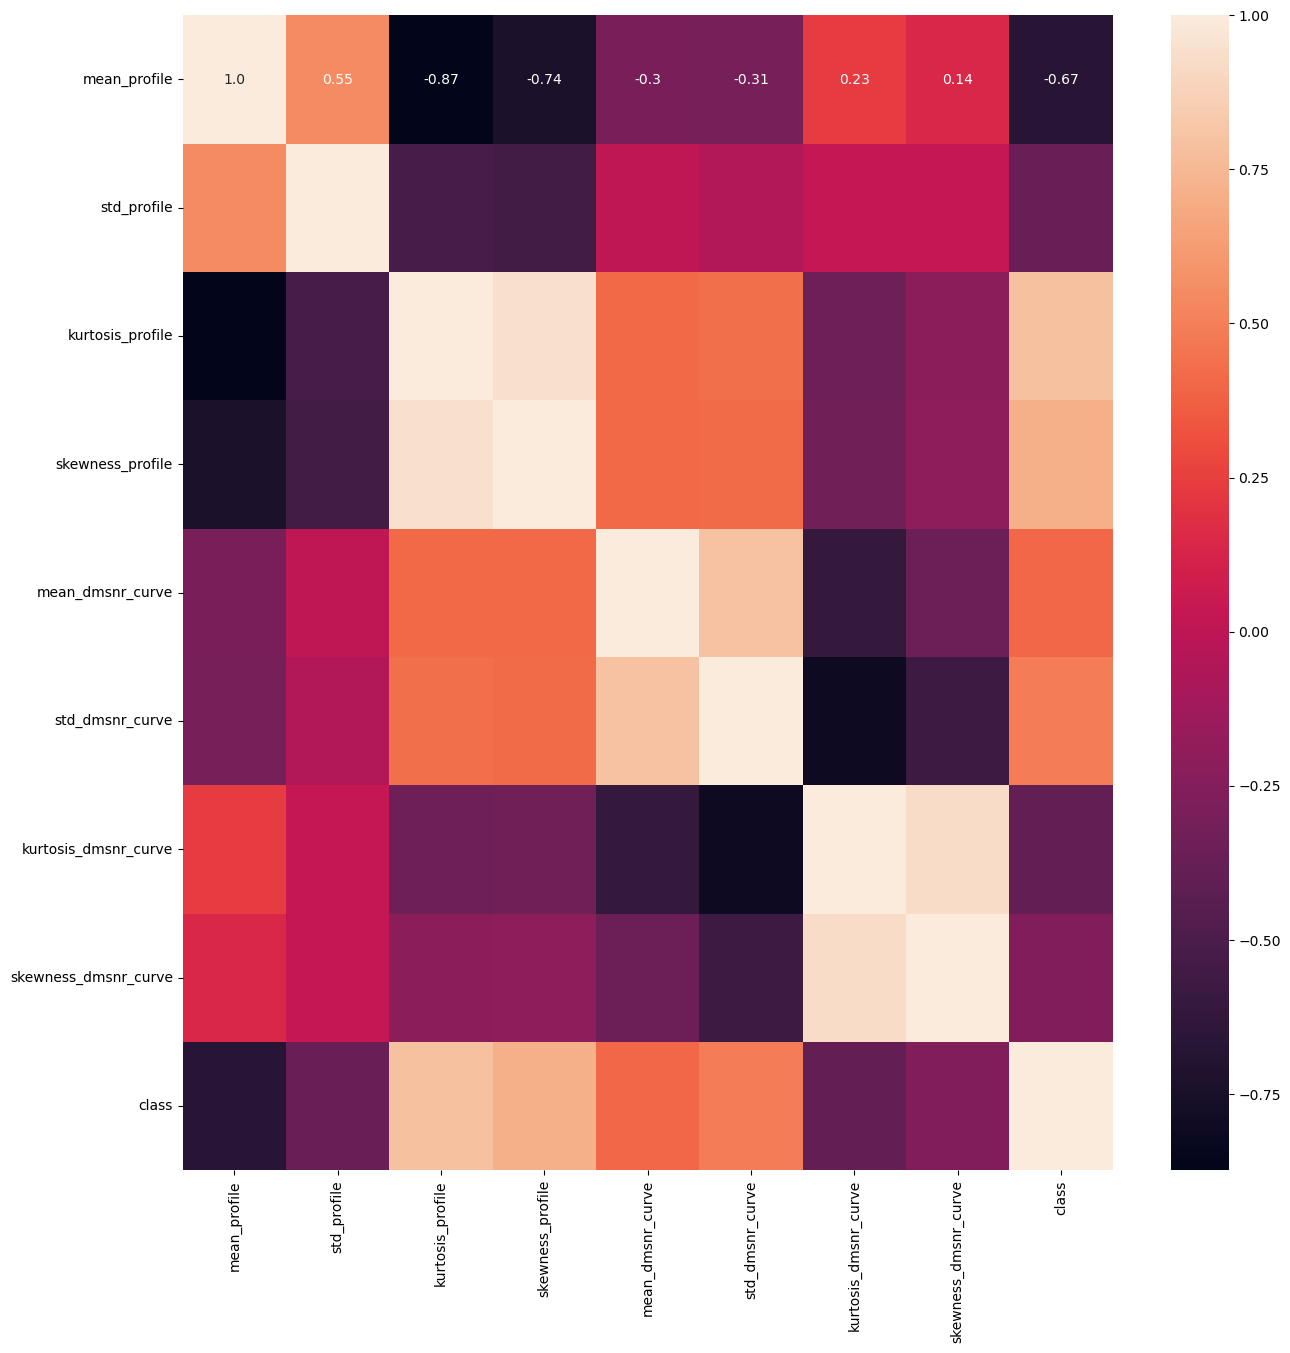

In [10]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, linecolor = "blue", fmt = ".2", ax = ax)
plt.show()

## График показывает соотношение коэффициента эксцесса от ассиметрии

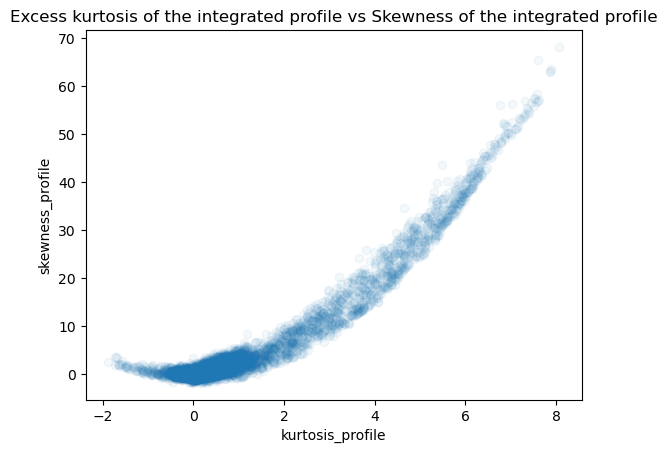

In [11]:
plt.plot(data['kurtosis_profile'], data['skewness_profile'], 'o', alpha = 0.05)
plt.xlabel('kurtosis_profile')
plt.ylabel('skewness_profile')
plt.title('Excess kurtosis of the integrated profile vs Skewness of the integrated profile')
pass

## Графики соотношения эксцесса от кривизны для интегрированного профиля и данных, полученных из DM-SNR соответственно

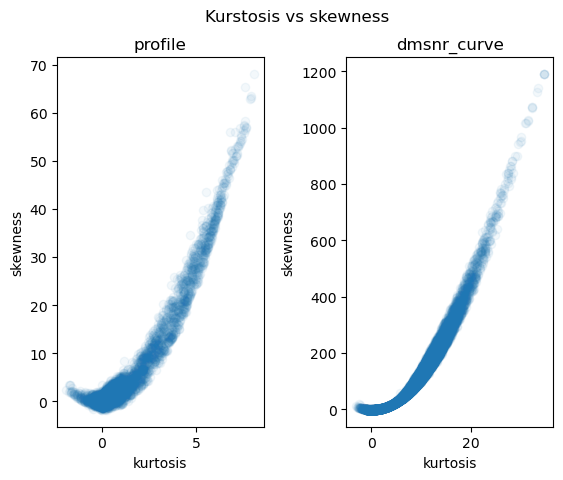

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Kurstosis vs skewness')
ax1.plot(data['kurtosis_profile'], data['skewness_profile'], 'o', alpha = 0.05)
ax1.set_title('profile')
ax1.set_xlabel('kurtosis')
ax1.set_ylabel('skewness')
ax2.plot(data['kurtosis_dmsnr_curve'], data['skewness_dmsnr_curve'], 'o', alpha = 0.05)
ax2.set_title('dmsnr_curve')
ax2.set_xlabel('kurtosis')
ax2.set_ylabel('skewness')
plt.subplots_adjust(wspace =.4)

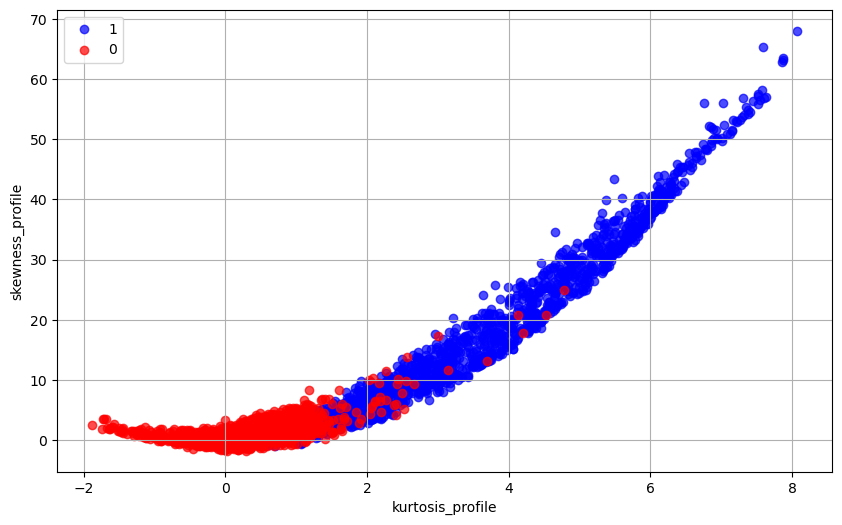

In [13]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 1]['kurtosis_profile'], 
            data[data['class'] == 1]['skewness_profile'], 
            alpha = 0.7, label = '1', color = 'b')

plt.scatter(data[data['class'] == 0]['kurtosis_profile'], 
            data[data['class'] == 0]['skewness_profile'], 
            alpha = 0.7, label = '0', color = 'r')

plt.xlabel('kurtosis_profile')
plt.ylabel('skewness_profile')
plt.legend()
plt.grid()

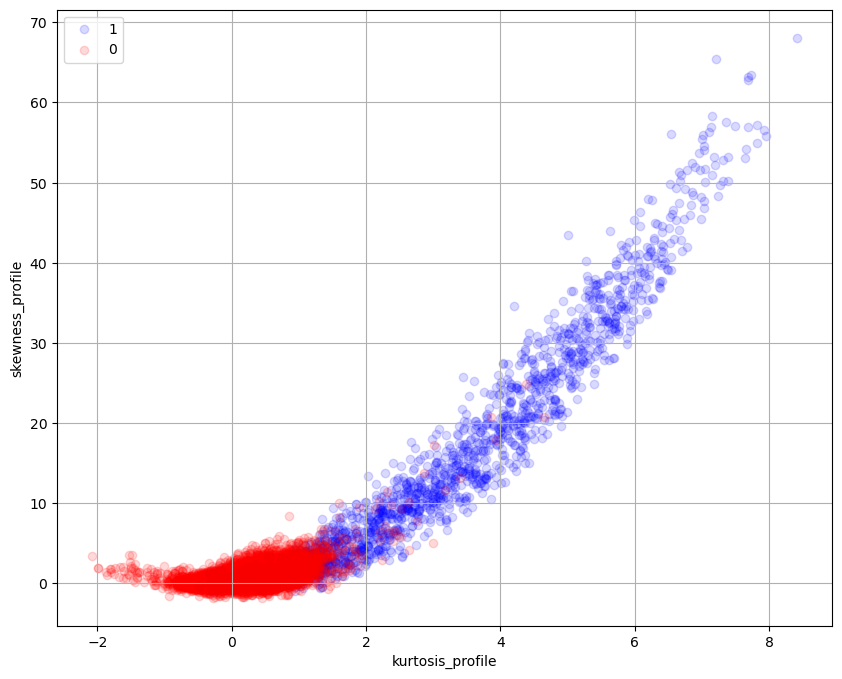

In [14]:
np.random.seed(0)
kurtosis_prf_rnd = data['kurtosis_profile'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(kurtosis_prf_rnd[data['class'] == 1], 
            data[data['class'] == 1]['skewness_profile'], 
            alpha = 0.15, label = '1', color = 'b')

plt.scatter(kurtosis_prf_rnd[data['class'] == 0], 
            data[data['class'] == 0]['skewness_profile'], 
            alpha = 0.15, label = '0', color = 'r')

plt.xlabel('kurtosis_profile')
plt.ylabel('skewness_profile')
plt.legend()
plt.grid()


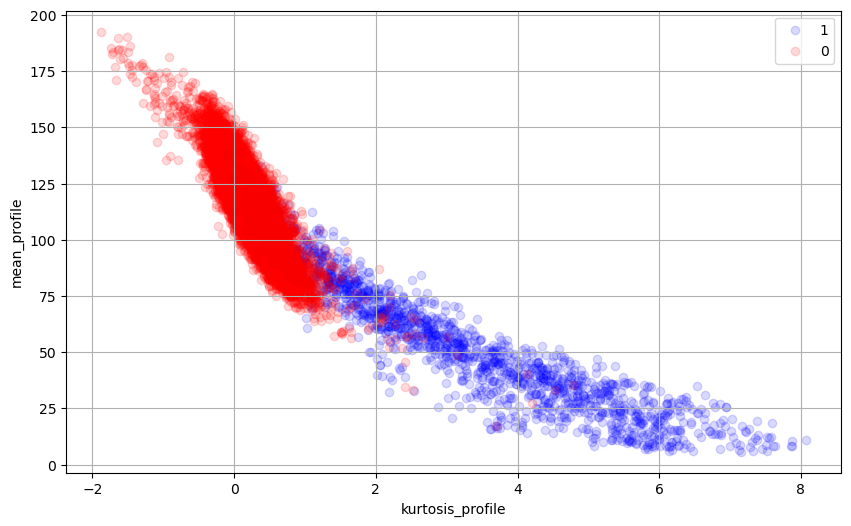

In [15]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 1]['kurtosis_profile'], 
            data[data['class'] == 1]['mean_profile'], 
            alpha = 0.15, label = '1', color = 'b')

plt.scatter(data[data['class'] == 0]['kurtosis_profile'], 
            data[data['class'] == 0]['mean_profile'], 
            alpha = 0.15, label = '0', color = 'r')

plt.xlabel('kurtosis_profile')
plt.ylabel('mean_profile')
plt.legend()
plt.grid()

# Обработка данных

In [16]:
data['kurtosis_dmsnr_curve'].dtype.name

'float64'

In [17]:
data['class'].dtype.name

'int64'

In [18]:
def is_group(group, _data):
    for val in _data:
        if val not in group:
            return False
    return True
group1 = [c for c in data.columns if is_group([1, 0], data[c])]
group2 = [c for c in data.columns if not is_group([1, 0], data[c])]
print(group1)
print(group2)

['class']
['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve', 'skewness_dmsnr_curve']


In [19]:
data.median(axis = 0)

mean_profile            115.078125
std_profile              46.947479
kurtosis_profile          0.223240
skewness_profile          0.198710
mean_dmsnr_curve          2.801839
std_dmsnr_curve          18.461316
kurtosis_dmsnr_curve      8.433515
skewness_dmsnr_curve     83.064556
class                     0.000000
dtype: float64

In [20]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [21]:
data[group1].count(axis = 0)

class    17898
dtype: int64

In [22]:
data[group2].count(axis = 0)

mean_profile            17898
std_profile             17898
kurtosis_profile        17898
skewness_profile        17898
mean_dmsnr_curve        17898
std_dmsnr_curve         17898
kurtosis_dmsnr_curve    17898
skewness_dmsnr_curve    17898
dtype: int64

In [23]:
data['mean_dmsnr_curve'].describe()

count    17898.000000
mean        12.614400
std         29.472897
min          0.213211
25%          1.923077
50%          2.801839
75%          5.464256
max        223.392141
Name: mean_dmsnr_curve, dtype: float64

In [24]:
type(data['mean_dmsnr_curve'].describe())

pandas.core.series.Series

In [25]:
data['mean_dmsnr_curve'].describe().max

<bound method Series.max of count    17898.000000
mean        12.614400
std         29.472897
min          0.213211
25%          1.923077
50%          2.801839
75%          5.464256
max        223.392141
Name: mean_dmsnr_curve, dtype: float64>

In [26]:
data['mean_dmsnr_curve'] = data['mean_dmsnr_curve'].fillna(max)


In [27]:
data.describe(include = ['float64'])

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [28]:
data_describe = data.describe(include = ['float64'])
for c in group2:
    data[c] = data[c].fillna(data_describe[c]['max'])

In [29]:
data.describe(include = ['float64'])

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [30]:
data_group1 = pd.get_dummies(data[group1])
print(data_group1.columns)


Index(['class'], dtype='object')


In [31]:
data_group2 = data[group2]
data_group2.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [32]:
data_group2 = (data_group2 - data_group2.mean(axis = 0))/data_group2.std(axis = 0)

In [33]:
data_group2.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,-1.683261e-16,1.737253e-15,7.304719e-17,1.270386e-17,1.905579e-17,2.858368e-17,4.446351e-16,3.811158e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.103525e+00,-3.182360e+00,-2.212200e+00,-5.775316e-01,-4.207659e-01,-9.735760e-01,-2.539412e+00,-1.003006e+00
25%,-3.956772e-01,-6.098785e-01,-4.236300e-01,-3.175873e-01,-3.627510e-01,-6.106232e-01,-5.596979e-01,-6.562222e-01
50%,1.558557e-01,5.815235e-02,-2.392930e-01,-2.547975e-01,-3.329350e-01,-4.039532e-01,2.884064e-02,-2.046026e-01
75%,6.239430e-01,6.537406e-01,-4.259311e-03,-1.365933e-01,-2.426006e-01,1.079367e-01,5.324799e-01,3.234452e-01
max,3.178475e+00,7.632315e+00,7.134757e+00,1.075426e+01,7.151579e+00,4.330417e+00,5.822404e+00,1.019713e+01


In [35]:
data = pd.concat((data_group1, data_group2), axis = 1)
data.describe()

,class,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,0.091574,-1.683261e-16,1.737253e-15,7.304719e-17,1.270386e-17,1.905579e-17,2.858368e-17,4.446351e-16,3.811158e-17
std,0.288432,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-4.103525e+00,-3.182360e+00,-2.212200e+00,-5.775316e-01,-4.207659e-01,-9.735760e-01,-2.539412e+00,-1.003006e+00
25%,0.000000,-3.956772e-01,-6.098785e-01,-4.236300e-01,-3.175873e-01,-3.627510e-01,-6.106232e-01,-5.596979e-01,-6.562222e-01
50%,0.000000,1.558557e-01,5.815235e-02,-2.392930e-01,-2.547975e-01,-3.329350e-01,-4.039532e-01,2.884064e-02,-2.046026e-01
75%,0.000000,6.239430e-01,6.537406e-01,-4.259311e-03,-1.365933e-01,-2.426006e-01,1.079367e-01,5.324799e-01,3.234452e-01
max,1.000000,3.178475e+00,7.632315e+00,7.134757e+00,1.075426e+01,7.151579e+00,4.330417e+00,5.822404e+00,1.019713e+01


In [36]:
X = data.drop('class', axis = 1)
y = data['class']
feature_names = X.columns

# kNN

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

12528 5370


In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
knn_y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test = np.mean(y_test != knn_y_test_predict)
err_train = np.mean(y_train != y_train_predict)

print(err_test, err_train)

0.019925512104283054 0.020274584929757342


In [42]:
err_test = 1 - knn.score(X_test, y_test)
err_test

0.01992551210428306

In [44]:
from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
nnb = range(1, 160, 7)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors' : nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.02195095986883866 8


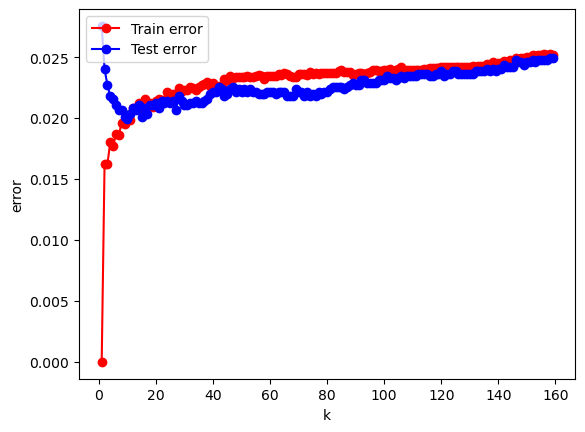

In [46]:
ran_k = range(1, 160, 1)
err_train_num = []
err_test_num = []

for i in ran_k:
    modify_k = KNeighborsClassifier(n_neighbors = i)
    modify_k.fit(X_train, y_train)
    err_train_num.append(np.mean(modify_k.predict(X_train) != y_train))
    err_test_num.append(np.mean(modify_k.predict(X_test) != y_test))
    
plt.plot(ran_k, err_train_num, 'r-o', label = 'Train error')
plt.plot(ran_k, err_test_num,  'b-o', label = 'Test error')
plt.xlabel('k')
plt.ylabel('error')
plt.legend(loc = 2)

%matplotlib inline

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-1.27881306, -1.27309776],
       [-1.02052495, -0.20115627],
       [ 0.18828333,  0.4321021 ],
       ...,
       [ 0.68181491, -2.68609516],
       [-1.10388162, -0.11650503],
       [ 3.71241917, -4.90372042]])

Text(0, 0.5, 'second component0')

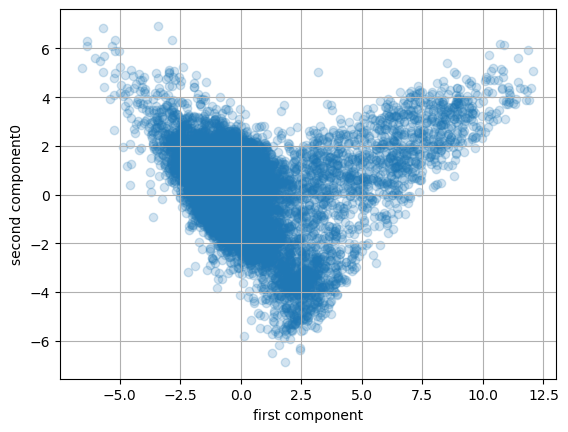

In [48]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], alpha = 0.2)
plt.grid()
plt.xlabel('first component')
plt.ylabel('second component0')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 24)
N_train, _ = X_train.shape
N_test, _= X_test.shape
print(N_train, N_test)

12528 5370


In [50]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

print("Errors on train and test data")
print(np.mean(y_train != knn.predict(X_train)), np.mean(y_test != knn.predict(X_test)))

Errors on train and test data
0.02418582375478927 0.027932960893854747


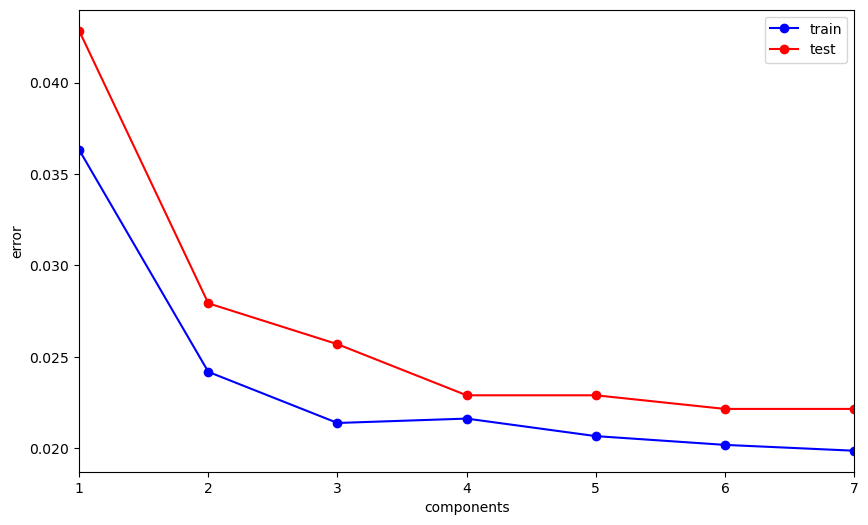

In [51]:
from sklearn.decomposition import PCA
components_num_array = np.arange(1, 8, 1)
train_error = []
test_error = []
for components_num in components_num_array:
    pca = PCA(n_components = components_num)
    X_PCA = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 24)
    knn = KNeighborsClassifier(n_neighbors = 8)
    knn.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != knn.predict(X_train)))
    test_error.append(np.mean(y_test != knn.predict(X_test)))
    
plt.figure(figsize = (10, 6))
plt.plot(components_num_array, train_error, 'b-o', label = 'train')
plt.plot(components_num_array, test_error, 'r-o', label = 'test')
plt.xlim([np.min(components_num_array), np.max(components_num_array)])
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [59]:
alpha = 5
mlp_model = MLPClassifier(hidden_layer_sizes = (2, ), solver = 'lbfgs', activation = 'logistic', alpha = alpha)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
mlp_y_test_pred = mlp_model.predict(X_test)

alpha = 5
mlp_model = MLPClassifier(hidden_layer_sizes = (2, ), solver = 'lbfgs', activation = 'logistic', alpha = alpha)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
mlp_y_test_pred = mlp_model.predict(X_test)

print("Errors on train data")
print(np.mean(y_train != y_train_pred))

Errors on train data
0.01995530012771392


In [60]:
alphas = np.logspace(-3, -0.5, 21)
print("Таблица alpha:", alphas)

Таблица alpha: [0.001      0.00133352 0.00177828 0.00237137 0.00316228 0.00421697
 0.00562341 0.00749894 0.01       0.01333521 0.01778279 0.02371374
 0.03162278 0.04216965 0.05623413 0.07498942 0.1        0.13335214
 0.17782794 0.23713737 0.31622777]


In [62]:
grid_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': alphas},
                              cv = 10,
                              return_train_score = True)
grid_classifier.fit(X_train, y_train)
best_alpha = grid_classifier.best_estimator_.alpha
print('Достигнутое минимальное значение ошибки: ', 1 - grid_classifier.best_score_,
      'при alpha = ' + str(best_alpha))

best_test_pred = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_pred != y_test)
print('Минимальное значение ошибки на тестовой выборке: ', best_test_err)
pass

/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Достигнутое минимальное значение ошибки:  0.018358686755620246 при alpha = 0.07498942093324558
Минимальное значение ошибки на тестовой выборке:  0.023277467411545624


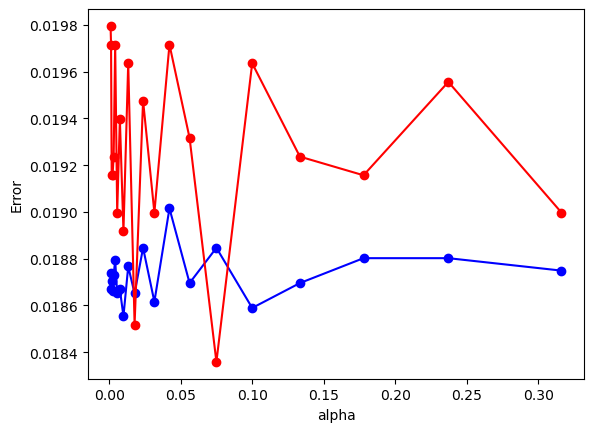

In [64]:
cv_mean_train_scores_by_alpha = sum(1 - grid_classifier.cv_results_["mean_train_score"].reshape(-1, len(alphas))) / (len(grid_classifier.cv_results_["mean_train_score"]) / len(alphas))
plt.plot(alphas, cv_mean_train_scores_by_alpha, 'b-o', label = 'train')
plt.xlabel("alpha")
plt.ylabel("Error")

cv_mean_test_scores_by_alpha = sum(1 - grid_classifier.cv_results_["mean_test_score"].reshape(-1, len(alphas))) / (len(grid_classifier.cv_results_["mean_test_score"]) / len(alphas))
plt.plot(alphas, cv_mean_test_scores_by_alpha, 'r-o', label = 'test')
%matplotlib inline

In [65]:
neurons = [(n,) for n in range(1, 20, 1)]
print("Число нейронов: ", neurons)

Число нейронов:  [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,)]


In [66]:
grid_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': (best_alpha,), 'hidden_layer_sizes': neurons},
                              cv = 10, return_train_score = True)
grid_classifier.fit(X_train, y_train)

print('Достигнуто минимальное значение ошибки:', 1 - grid_classifier.best_score_,
     'при числе нейронов = ' + str(grid_classifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_predictions != y_test)
print('Минимальное значение ошибки на тестовой выборке:', best_test_err)

# Достигнуто минимальное значение ошибки: 0.018837537513800684 при числе нейронов = (11,)
# Минимальное значение ошибки на тестовой выборке: 0.021787709497206705

/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status

Достигнуто минимальное значение ошибки: 0.018837537513800684 при числе нейронов = (11,)
Минимальное значение ошибки на тестовой выборке: 0.021787709497206705


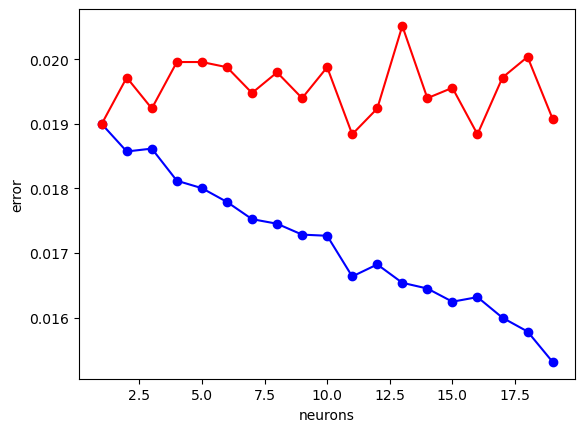

In [67]:
cv_mean_train_scores_by_neurons = sum(1-grid_classifier.cv_results_["mean_train_score"].reshape(-1, len(neurons))) / \
    (len(grid_classifier.cv_results_["mean_train_score"]) / len(neurons))
plt.plot(neurons, cv_mean_train_scores_by_neurons, 'b-o', label = 'train')
plt.xlabel("neurons")
plt.ylabel("error")

cv_mean_test_scores_by_neurons = sum(1-grid_classifier.cv_results_["mean_test_score"].reshape(-1, len(neurons))) / \
    (len(grid_classifier.cv_results_["mean_test_score"]) / len(neurons))
plt.plot(neurons, cv_mean_test_scores_by_neurons, 'r-o', label = 'test')
%matplotlib inline

In [68]:
grif_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': alphas, 'hidden_layer_sizen': neurons}, cv = 10)
grid_classifier.fit(X_train, y_train)

print('Достигнуто минимальное значение ошибки:', 1 - grid_classifier.best_score_,
     'при alpha = ' + str(grid_classifier.best_estimator_.alpha),
     'при числе нейронов = ' + str(grid_classifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_predictions != y_test)
print('Минимальное значение ошибки на тестовой выборке:', best_test_err)

# Достигнуто минимальное значение ошибки: 0.019077090382443318 при alpha = 0.07498942093324558 при числе нейронов = (14,)
# Минимальное значение ошибки на тестовой выборке: 0.0223463687150838

/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status

Достигнуто минимальное значение ошибки: 0.019077090382443318 при alpha = 0.07498942093324558 при числе нейронов = (14,)
Минимальное значение ошибки на тестовой выборке: 0.0223463687150838


In [69]:
best_neuron = grid_classifier.best_estimator_.hidden_layer_sizes[0]
second_layer_neurons = [(best_neuron, n) for n in range(1, 20, 1)]
print(second_layer_neurons)

[(14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (14, 12), (14, 13), (14, 14), (14, 15), (14, 16), (14, 17), (14, 18), (14, 19)]


In [70]:
grid_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': (best_alpha, ), 'hidden_layer_sizes': second_layer_neurons},
                              cv = 10, return_train_score = True)
grid_classifier.fit(X_train, y_train)

print('Достигнуто минимальное значение ошибки:', 1 - grid_classifier.best_score_,
     'при alpha = ' + str(grid_classifier.best_estimator_.alpha),
     'при числе нейронов = ' + str(grid_classifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_predictions != y_test)
print('Минимальное значение ошибки на тестовой выборке:', best_test_err)

# Достигнуто минимальное значение ошибки: 0.01907702663766686 при alpha = 0.07498942093324558 при числе нейронов = (14, 13)
# Минимальное значение ошибки на тестовой выборке: 0.020856610800744878

/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status

Достигнуто минимальное значение ошибки: 0.01907702663766686 при alpha = 0.07498942093324558 при числе нейронов = (14, 13)
Минимальное значение ошибки на тестовой выборке: 0.020856610800744878


/home/ruslan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
